In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("experiments.csv", sep=";", header=[1], index_col=0, na_values="–")

In [4]:
df.head()

,Description (white and grey colours show experiment groups – for convenience only),File with scores (same files mean exactly the same model training),"Split into train/validation (old is not shuffled, new is shuffled)",Train random fraction of all train data,Validation random fraction of all validation data,Version (same values mean exactly the same dataset),Batch size,Model,Is pretrained,Trainable parameters,Optimizer,Lr scheduler,N_epochs,Best epoch (0 <= x <= N_epoch – 1),Best validation score,Approximate train time (sec/epoch),Approximate validation time (sec/epoch),Private score,Public score,Is submit correct rounding (np.around().astype(np.int) instead of astype(np.int)),Submit name,Is late submit
0,Resnet18 first approach,NaN,Old,0.1,0.1,V1,512,resnet18,True,all,Adam(0.001),NaN,1,0.0,NaN,NaN,NaN,1494.53465,1504.53696,False,1_baseline_submit.csv,False
1,Resnet18 first approach,NaN,Old,0.1,0.1,V1,512,resnet18,True,all,Adam(0.001),NaN,20,NaN,NaN,NaN,NaN,19.13296,18.98150,False,2_submit.csv,False
2,Resnet18 first approach,NaN,Old,0.1,0.1,V1,512,resnet18,True,all,Adam(0.001),NaN,40,NaN,NaN,NaN,NaN,15.26668,15.55896,False,3_submit.csv,False
3,Resnet18 first approach,NaN,Old,0.1,0.1,V1,512,resnet18,True,all,Adam(0.001),NaN,60,NaN,NaN,NaN,NaN,13.87672,14.21123,False,4_submit.csv,False
4,Resnet18 baseline on full dataset,01.txt,Old,1.0,1.0,Full_old,512,resnet18,True,all,Adam(0.001),NaN,20,18.0,1.99,NaN,NaN,10.32738,10.65614,False,5_submit.csv,False


График линейной зависимости между MSE на валидационной выборке и MSE на Public Leaderboard на Kaggle. Различие в значениях объясняетя тем, что на валидационной выборке метрика вычислялась на сжатых обрезанных изображениях.

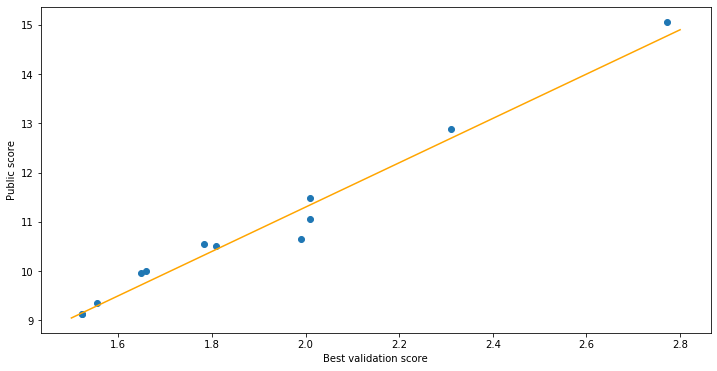

In [66]:
x_name = "Best validation score"
y_name = "Public score"

fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel=x_name, ylabel=y_name)

ax.scatter(df[x_name], df[y_name], marker="o")

x = np.arange(1.5, 2.81, 0.1)
y = 4.5 * x + 2.3
ax.plot(x, y, color="orange")
# plt.savefig("local_and_kaggle_scores.png", dpi=300)

In [6]:
import itertools
import pandas as pd

In [7]:
df = pd.read_csv("test_points.csv", sep="\t")

In [8]:
df.head()

,file_name,point_index_list
0,c59b2834147079f3e34627f1e75656b1.jpg,"[742, 385, 583, 758, 132, 634, 779, 219, 750, ..."
1,85629eb20fdbbb98d0ee20ed9f3ba233.jpg,"[456, 549, 339, 804, 143, 241, 121, 291, 835, ..."
2,4df0124462ce32e0e8dd5d96a7d6496d.jpg,"[343, 907, 662, 470, 551, 1, 15, 144, 126, 557..."
3,fca085b03b834d9d94170e8f1453276e.jpg,"[916, 842, 715, 351, 147, 808, 893, 785, 591, ..."
4,67b598c8621b1f7135dfbc1c47fe2893.jpg,"[818, 186, 469, 337, 768, 358, 887, 207, 145, ..."


In [9]:
df["point_index_list"] = df["point_index_list"].apply(eval)

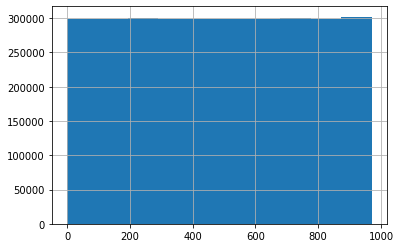

In [10]:
pd.Series(itertools.chain.from_iterable(df["point_index_list"])).hist()

Каждая из 971 точки равновероятно встречается в 30 финальных точках, по которым оцениваются модели.